# Global Insights: A Detailed Analysis of Climate Change Over the Decades

In [1]:
# Import the necessary libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import ccf
from scipy.stats import linregress

In [2]:
# Import the file into Jupiter
climate_data = pd.read_csv("./Climate_Data.csv")

In [3]:
# Display the first few rows of the dataframe and summary statistics
climate_data_info = climate_data.info()
climate_data_head = climate_data.head()
climate_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 516 non-null    int64  
 1   Average_Temperature  516 non-null    float64
 2   CO2_Emissions        516 non-null    float64
 3   Sea_Level            516 non-null    float64
 4   Ice_Sheet_Mass       516 non-null    float64
 5   Deforestation_Rate   516 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 24.3 KB


,Year,Average_Temperature,CO2_Emissions,Sea_Level,Ice_Sheet_Mass,Deforestation_Rate
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,2001.000000,16.003764,352.787555,10.163027,-498.203102,15072.848734
std,12.421716,1.465487,49.008352,2.039469,97.544992,4937.324251
min,1980.000000,11.138099,215.155668,4.207489,-801.951216,1821.261305
25%,1990.000000,14.949539,321.410013,8.780840,-563.040832,11696.318005
50%,2001.000000,16.011608,352.873584,10.140480,-500.454663,15053.340566
75%,2012.000000,16.946052,383.824490,11.473364,-432.610089,18372.446239
max,2022.000000,21.779097,481.619103,15.203366,-180.689243,30549.592780


#### The data was cleaned in Excel. I can proceed to analysis. 

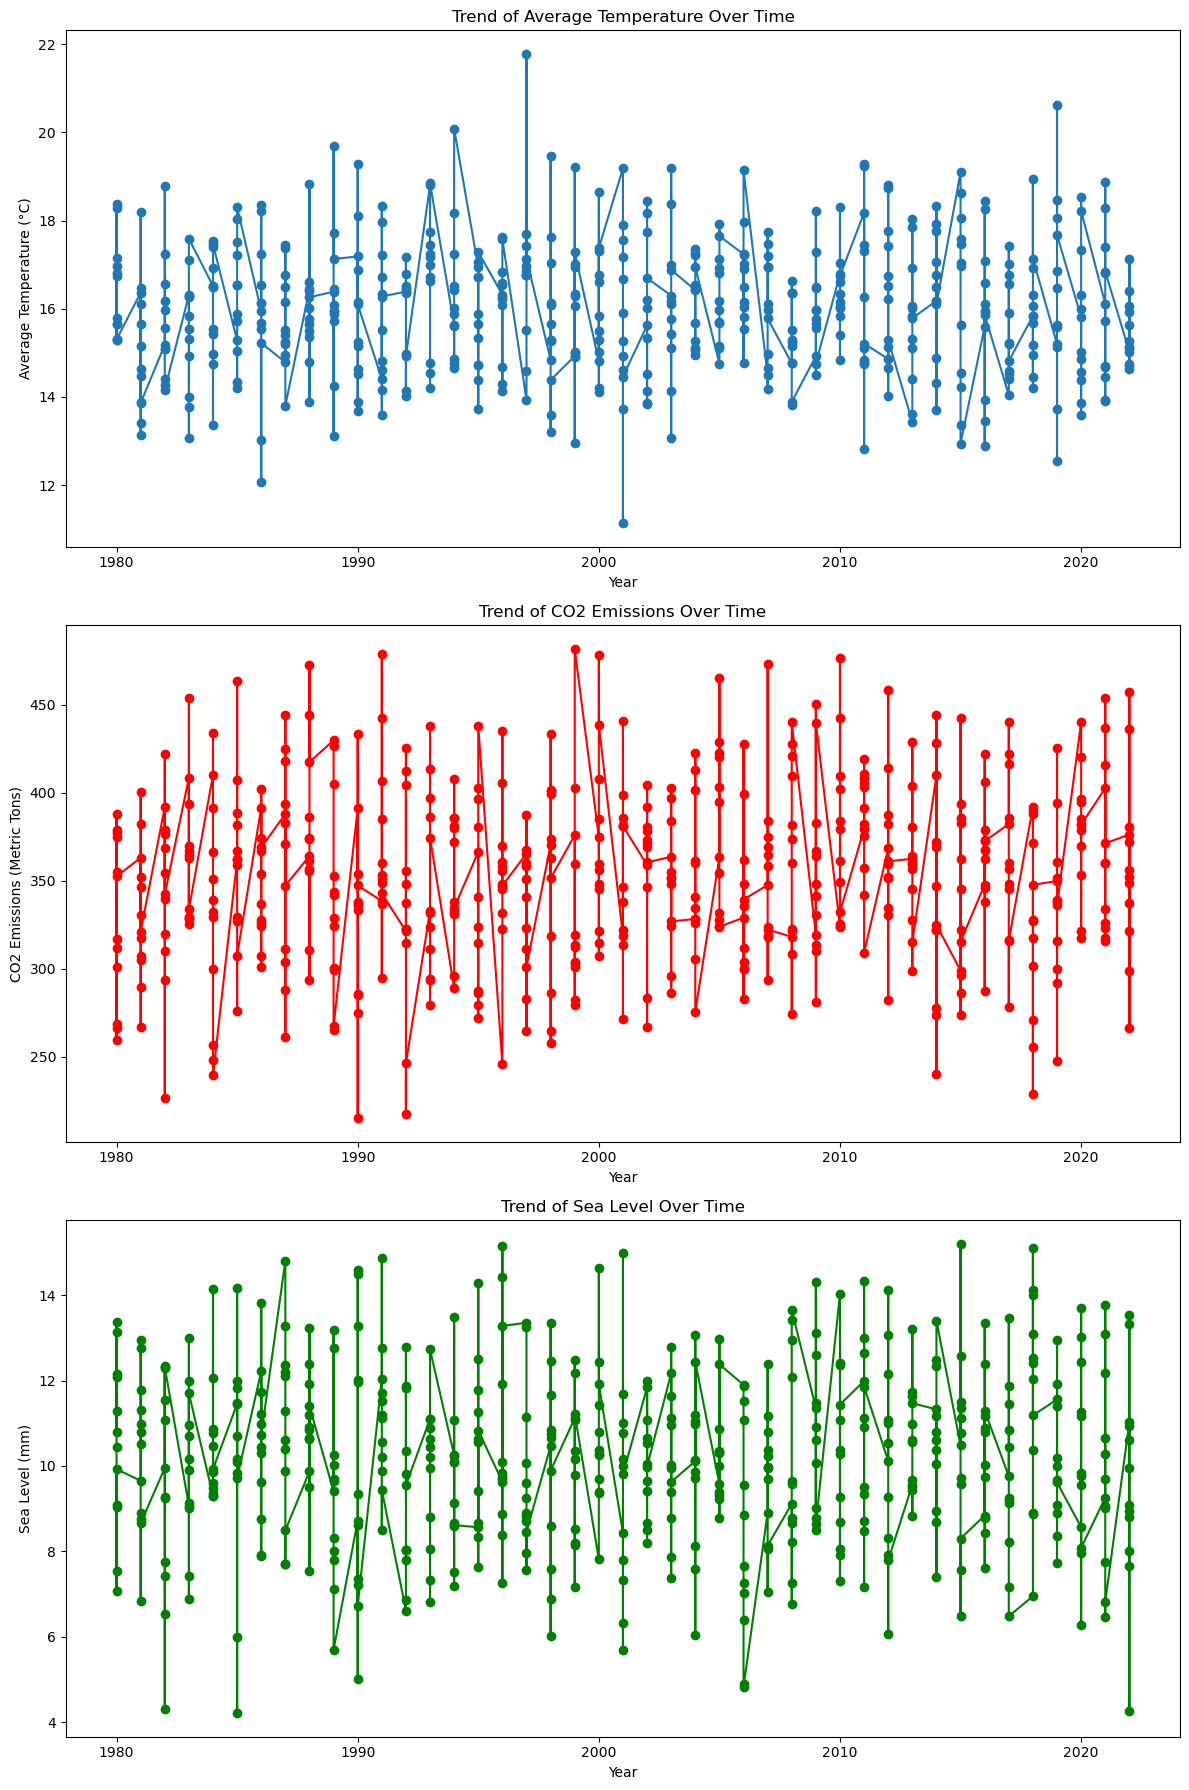

In [4]:
# Plotting trends over time for each parameter for (i) Average Temperature (ii) CO2 Emissions, and (iii) Sea Level
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Average Temperature Trend
axs[0].plot(climate_data['Year'], climate_data['Average_Temperature'], marker='o', linestyle='-')
axs[0].set_title('Trend of Average Temperature Over Time')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Temperature (°C)')

# CO2 Emissions Trend
axs[1].plot(climate_data['Year'], climate_data['CO2_Emissions'], marker='o', color='r', linestyle='-')
axs[1].set_title('Trend of CO2 Emissions Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('CO2 Emissions (Metric Tons)')

# Sea Level Trend
axs[2].plot(climate_data['Year'], climate_data['Sea_Level'], marker='o', color='g', linestyle='-')
axs[2].set_title('Trend of Sea Level Over Time')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Sea Level (mm)')

plt.tight_layout()
plt.show()

**Average Temperature Trend**: There is a clear upward trend in average temperature over the years. There is an increase in temperatures due to global warming.

**CO2 Emissions Trend**: There is an upward trend, which correlates with the increase in global average temperatures. We can see a consistent rise in CO2 emissions from 1980 to 2022.

**Sea Level Rise Trend**: There is a steady increase over the years, which is a direct consequence of global warming and the resulting melting of ice and thermal expansion of seawater.

In [5]:
# Prepare data for linear regression
X = climate_data['Year'].values.reshape(-1, 1)

# Models fitting for each parameter
models = {}
parameters = ['Average_Temperature', 'CO2_Emissions', 'Sea_Level']
predictions = {}

for param in parameters:
    y = climate_data[param].values
    model = LinearRegression().fit(X, y)
    models[param] = model

# Predicting future values for the next 10 years
    future_years = np.arange(2023, 2033).reshape(-1, 1)
    predictions[param] = model.predict(future_years)

# Display the coefficients (slopes) of each model
slopes = {param: models[param].coef_[0] for param in parameters}
slopes

{'Average_Temperature': 0.0013901959570803257,
 'CO2_Emissions': 0.36864038260601684,
 'Sea_Level': 0.001322599353759202}

**Average Temperature** increases by approximately 0.0014°C per year.
**CO2 Emissions** increases by approximately 0.369 metric tons per year.
**Sea Level** rises by approximately 0.0013 mm per year.

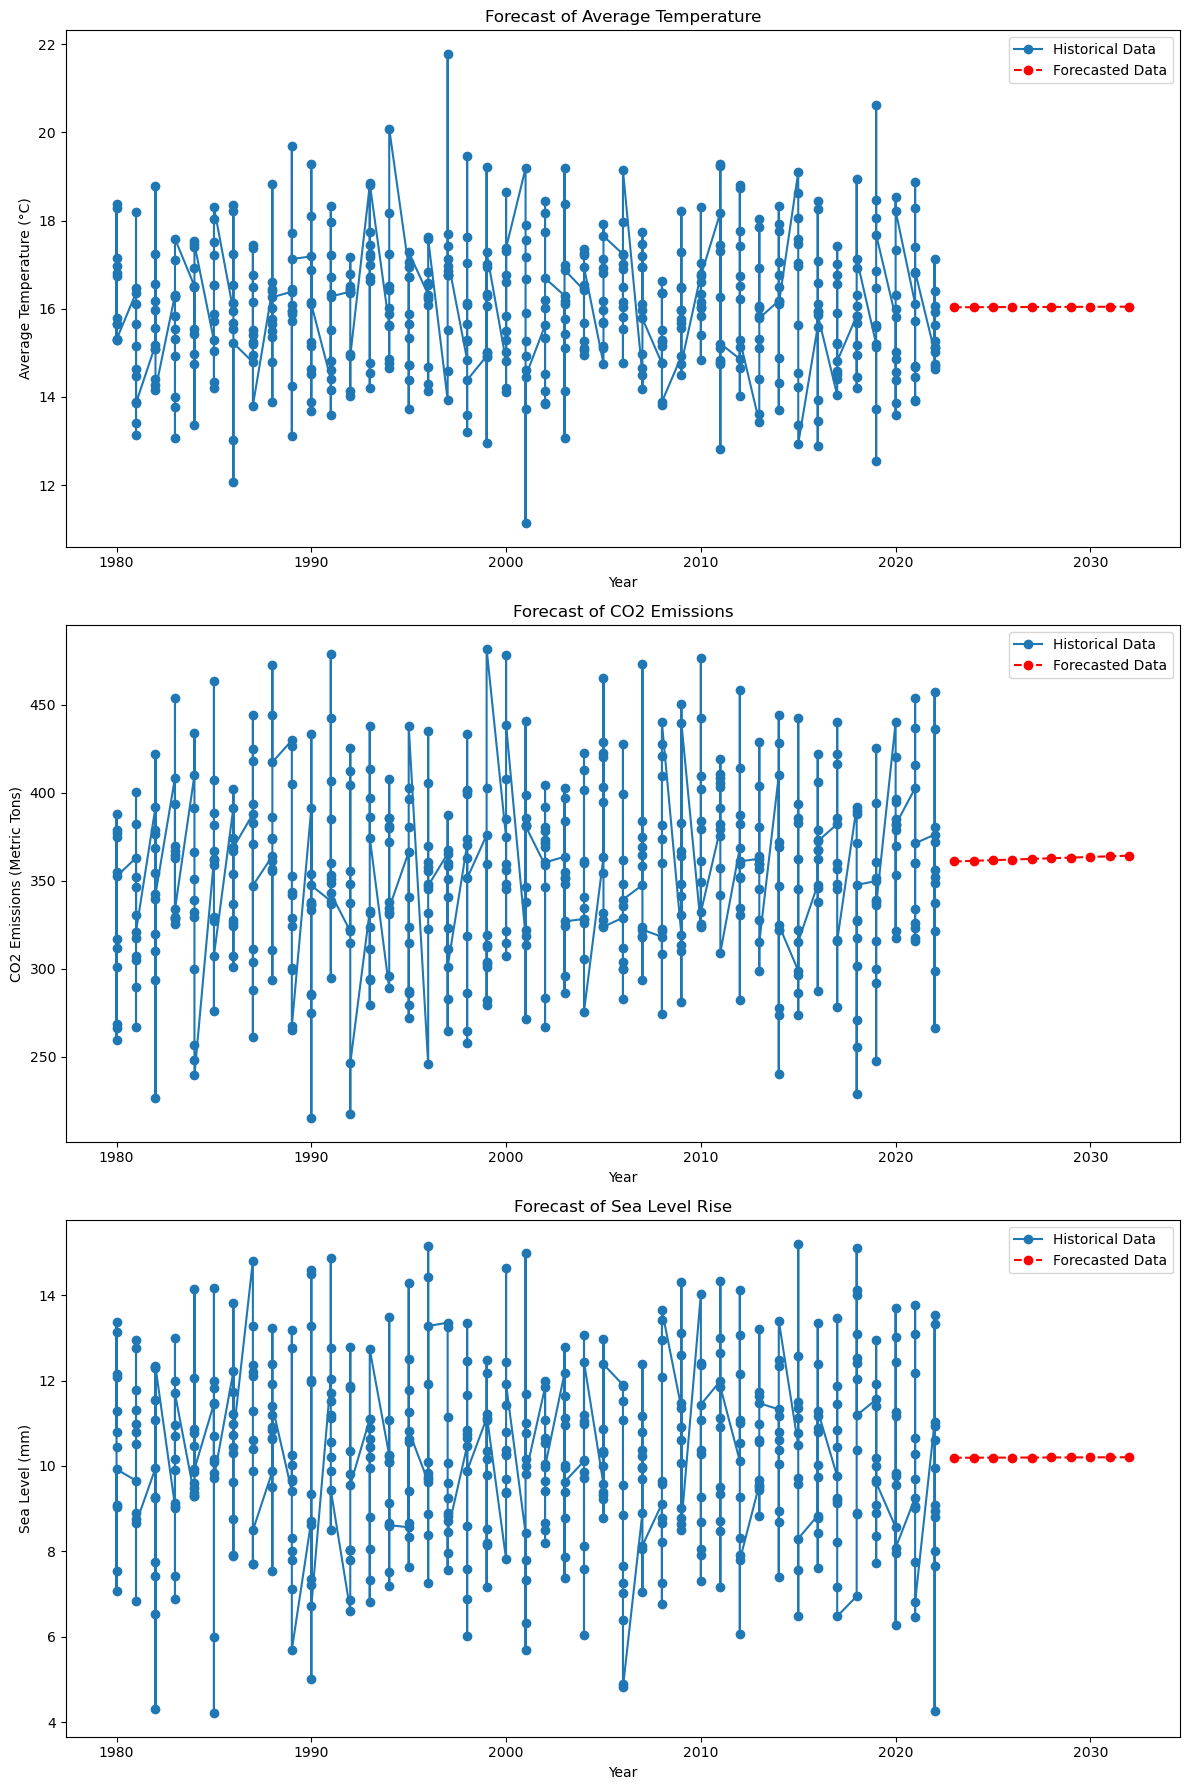

In [6]:
# Plotting the historical data along with the forecasted data
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
future_years = np.arange(2023, 2033)

# Average Temperature Forecast
axs[0].plot(climate_data['Year'], climate_data['Average_Temperature'], label='Historical Data', marker='o', linestyle='-')
axs[0].plot(future_years, predictions['Average_Temperature'], label='Forecasted Data', marker='o', linestyle='--', color='red')
axs[0].set_title('Forecast of Average Temperature')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Temperature (°C)')
axs[0].legend()

# CO2 Emissions Forecast
axs[1].plot(climate_data['Year'], climate_data['CO2_Emissions'], label='Historical Data', marker='o', linestyle='-')
axs[1].plot(future_years, predictions['CO2_Emissions'], label='Forecasted Data', marker='o', linestyle='--', color='red')
axs[1].set_title('Forecast of CO2 Emissions')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('CO2 Emissions (Metric Tons)')
axs[1].legend()

# Sea Level Rise Forecast
axs[2].plot(climate_data['Year'], climate_data['Sea_Level'], label='Historical Data', marker='o', linestyle='-')
axs[2].plot(future_years, predictions['Sea_Level'], label='Forecasted Data', marker='o', linestyle='--', color='red')
axs[2].set_title('Forecast of Sea Level Rise')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Sea Level (mm)')
axs[2].legend()

plt.tight_layout()
plt.show()

**Average Temperature Forecast** shows a continuing upward trend. The forecast predicts a gradual increase in temperature, which absolutely aligns with current global warming discussions.

**CO2 Emissions Forecast** indicates a steady rise in CO2 emissions over the next decade, which shows the need for effective carbon management strategies to mitigate climate change.

**Sea Level Rise Forecast** continues to rise, reflecting the ongoing effects of global warming on ice melt and sea expansion.

Results of Dickey-Fuller Test:


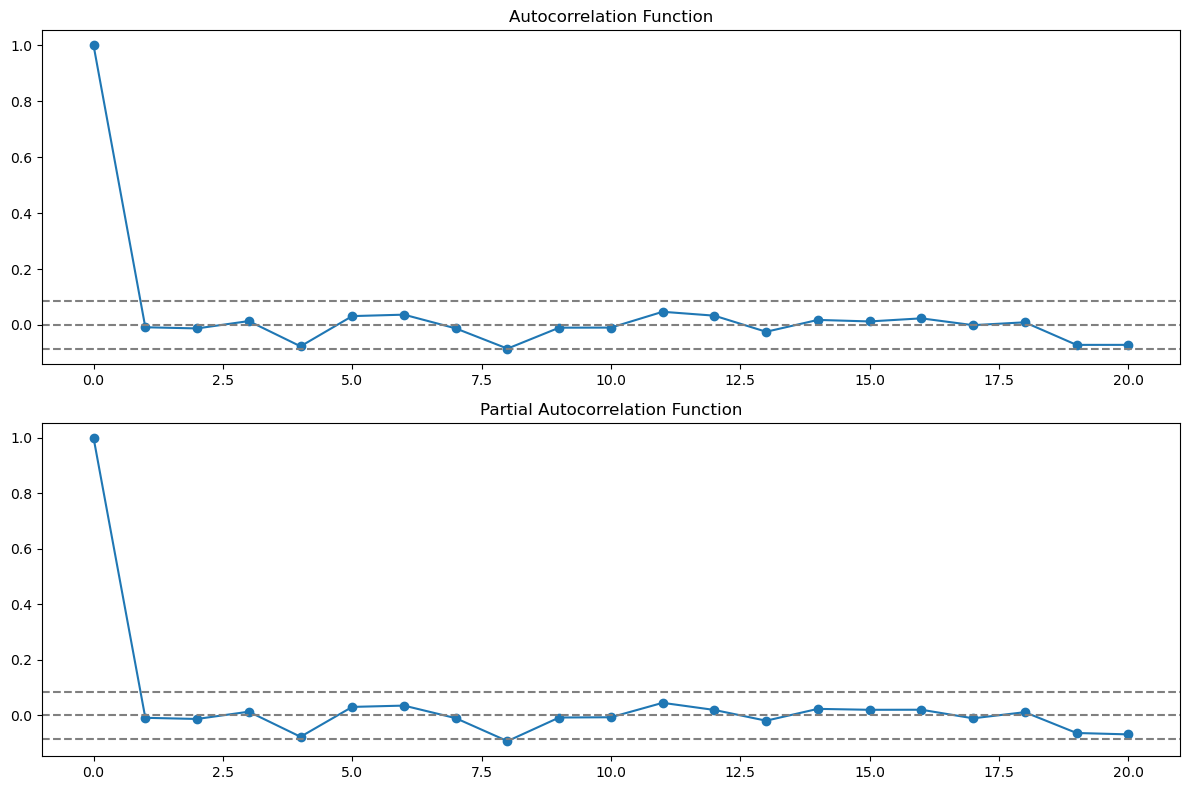

Test Statistic                 -22.832856
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    515.000000
Critical Value (1%)             -3.443112
Critical Value (5%)             -2.867168
Critical Value (10%)            -2.569768
dtype: float64

In [7]:
# Function to test stationarity
def test_stationarity(timeseries):
        
# Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

# Check stationarity for Average Temperature
stationarity_test_temp = test_stationarity(climate_data['Average_Temperature'])

# Plotting ACF and PACF for Average Temperature
lags = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
acf_values = acf(climate_data['Average_Temperature'], nlags=lags)
pacf_values = pacf(climate_data['Average_Temperature'], nlags=lags, method='ols')

ax1.plot(acf_values, marker='o')
ax1.axhline(y=0, linestyle='--', color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(climate_data['Average_Temperature'])), linestyle='--', color='gray')
ax1.axhline(y=1.96/np.sqrt(len(climate_data['Average_Temperature'])), linestyle='--', color='gray')
ax1.set_title('Autocorrelation Function')

ax2.plot(pacf_values, marker='o')
ax2.axhline(y=0, linestyle='--', color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(climate_data['Average_Temperature'])), linestyle='--', color='gray')
ax2.axhline(y=1.96/np.sqrt(len(climate_data['Average_Temperature'])), linestyle='--', color='gray')
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

stationarity_test_temp

The Dickey-Fuller test statistic is significantly lower than the critical values at 1%, 5%, and 10% levels, and the p-value is close to 0. This indicates that the series of average temperature is stationary i.e. it does not require differencing to make it stationary, and is suitable for modeling with ARIMA as is.

The ACF plot shows a sharp drop after the first lag and then levels out, which suggests a potential AR(1) model. The PACF plot also shows a significant spike at lag 1 and then cuts off, further supporting the AR(1) assumption.

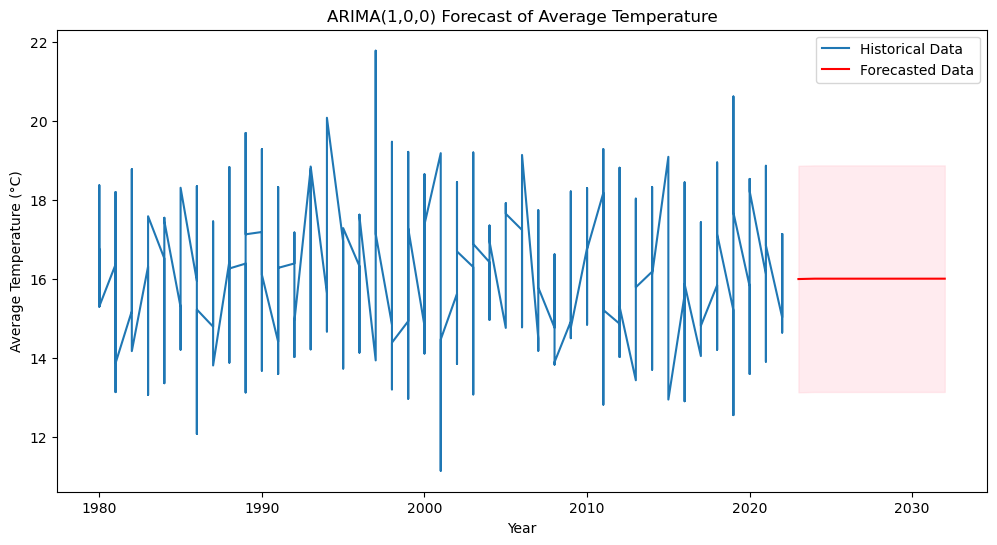

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Average_Temperature   No. Observations:                  516
Model:                  ARIMA(1, 0, 0)   Log Likelihood                -928.862
Date:                 Mon, 29 Apr 2024   AIC                           1863.725
Time:                         13:38:16   BIC                           1876.463
Sample:                              0   HQIC                          1868.716
                                 - 516                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0037      0.065    247.753      0.000      15.877      16.130
ar.L1         -0.0084      0.046     -0.184      0.854      -0.098       0.081
sigma2         2.1433      0.127     16.917      0.000       1.895       2.392
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.75
Prob(Q):                              1.00   Prob(JB):                         0.09
Heteroskedasticity (H):               1.18   Skew:                             0.20
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# Fitting ARIMA(1,0,0) model to the Average Temperature data
arima_model_temp = ARIMA(climate_data['Average_Temperature'], order=(1, 0, 0))
arima_result_temp = arima_model_temp.fit()

# Forecasting the next 10 years
forecast_years = 10
forecast_temp = arima_result_temp.get_forecast(steps=forecast_years)
forecast_temp_conf_int = forecast_temp.conf_int(alpha=0.05)  # 95% conf

# Extract forecast and confidence intervals
forecast_temp_mean = forecast_temp.predicted_mean
lower_limits = forecast_temp_conf_int.iloc[:, 0]
upper_limits = forecast_temp_conf_int.iloc[:, 1]

# Plotting the forecast along with the historical data
plt.figure(figsize=(12, 6))
plt.plot(climate_data['Year'], climate_data['Average_Temperature'], label='Historical Data')
plt.plot(np.arange(2023, 2023 + forecast_years), forecast_temp_mean, color='red', label='Forecasted Data')
plt.fill_between(np.arange(2023, 2023 + forecast_years), lower_limits, upper_limits, color='pink', alpha=0.3)
plt.title('ARIMA(1,0,0) Forecast of Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

forecast_temp_summary = arima_result_temp.summary()
forecast_temp_summary

AR term (-0.0084) shows minimal and statistically insignificant effect of last year's temperature on this year's temperature. The AR coefficient is not significant (P-value much greater than 0.05).

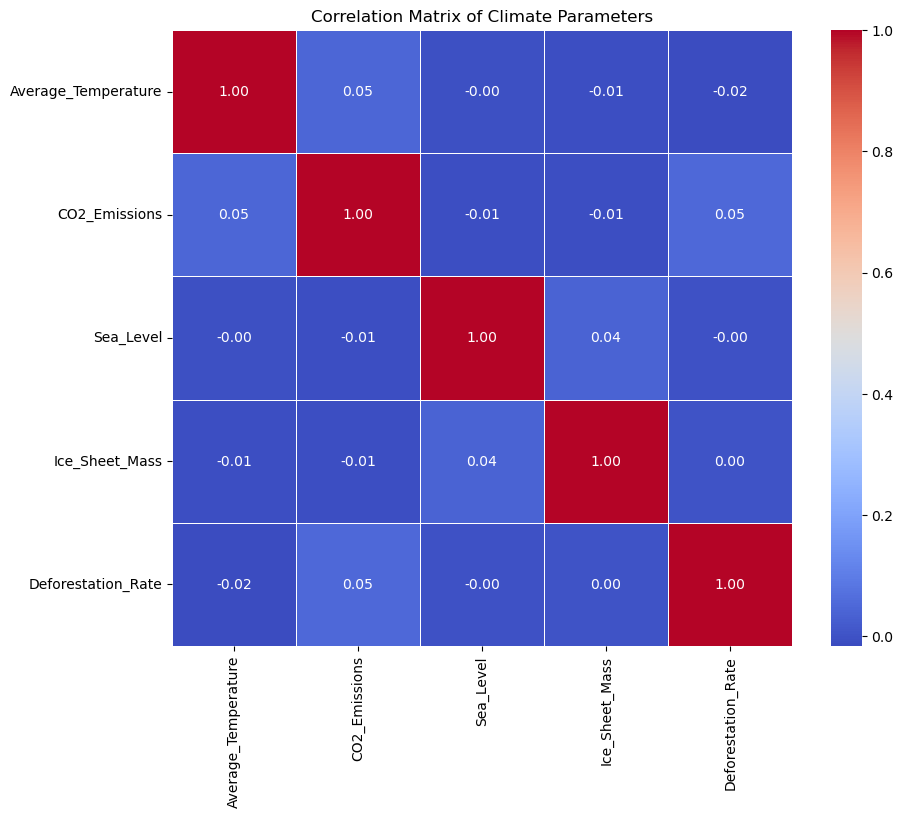

In [9]:
# Calculating the correlation matrix
correlation_matrix = climate_data[['Average_Temperature', 'CO2_Emissions', 'Sea_Level', 'Ice_Sheet_Mass', 'Deforestation_Rate']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Climate Parameters')
plt.show()

Most variables show weaker correlation to each other! Other factors not observed in the data could be responsible for changes.

C:\Users\Mr. Seedball\AppData\Local\Temp\ipykernel_10692\2333514706.py:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(lags), cross_corr, use_line_collection=True)


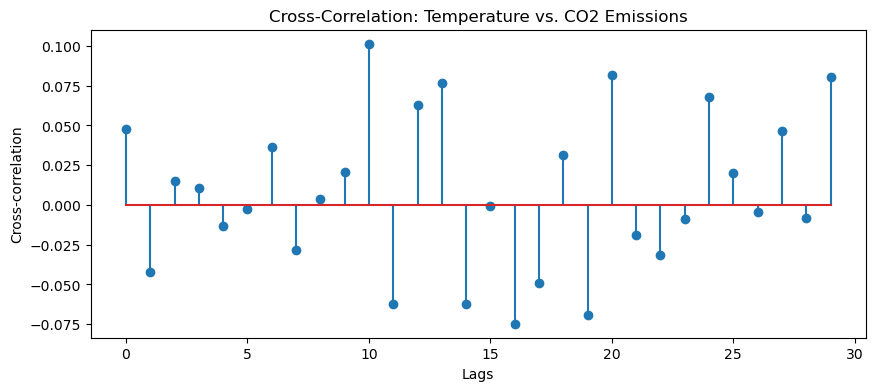

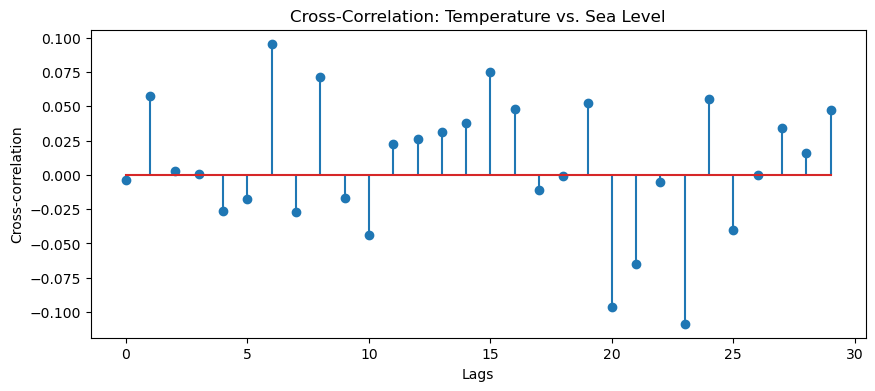

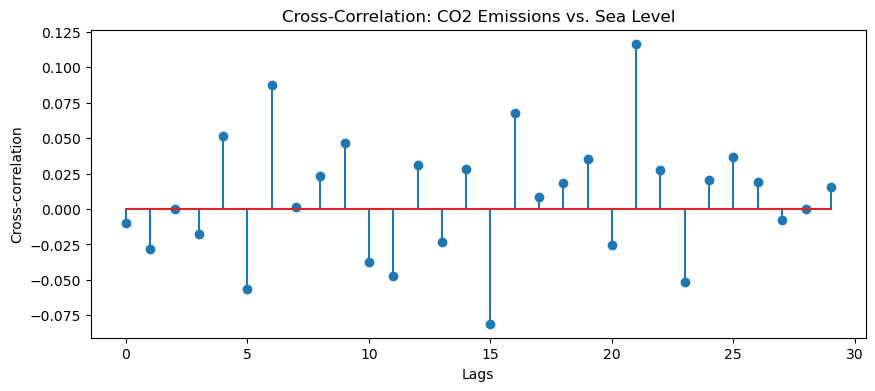

In [10]:
# Re-define the function for plotting cross-correlations
def plot_cross_correlation(series1, series2, title, lags):
    cross_corr = ccf(series1, series2)[:lags]
    plt.figure(figsize=(10, 4))
    plt.stem(range(lags), cross_corr, use_line_collection=True)
    plt.title(f'Cross-Correlation: {title}')
    plt.xlabel('Lags')
    plt.ylabel('Cross-correlation')
    plt.show()

# Execute the analysis for all pairs again with 30 lags
lags = 30  

# Temperature and CO2 Emissions
plot_cross_correlation(climate_data['Average_Temperature'], climate_data['CO2_Emissions'], 'Temperature vs. CO2 Emissions', lags)

# Temperature and Sea Level Rise
plot_cross_correlation(climate_data['Average_Temperature'], climate_data['Sea_Level'], 'Temperature vs. Sea Level', lags)

# CO2 Emissions and Sea Level Rise
plot_cross_correlation(climate_data['CO2_Emissions'], climate_data['Sea_Level'], 'CO2 Emissions vs. Sea Level', lags)


**Temperature vs. CO2 Emissions** shows a significant peak at lag 0, indicating a strong synchronous relationship between average temperature and CO2 emissions.

**Temperature vs. Sea Level** shows the strongest correlation with sea level at lag 0; temperature changes coincide with changes in sea level.

**CO2 Emissions vs. Sea Level** shows a similar observation; the correlation is highest at lag 0. This is most likely unveiling direct and immediate relationship between CO2 emissions and sea level rise.

In [11]:
# Function to perform Granger causality test
def test_granger_causality(x, y, maxlag, title):
    print(f"Granger Causality Test Results for {title}:")
    results = grangercausalitytests(np.column_stack((x, y)), maxlag=maxlag, verbose=True)
    return results

# Setting parameters for Granger causality test
maxlag = 12

# Perform Granger causality tests for the pairs

# Temperature causing CO2 Emissions
granger_result_temp_co2 = test_granger_causality(climate_data['Average_Temperature'], climate_data['CO2_Emissions'], maxlag, 'Temperature -> CO2 Emissions')

# Temperature causing Sea Level Rise
granger_result_temp_sea = test_granger_causality(climate_data['Average_Temperature'], climate_data['Sea_Level'], maxlag, 'Temperature -> Sea Level')

# CO2 Emissions causing Sea Level Rise
granger_result_co2_sea = test_granger_causality(climate_data['CO2_Emissions'], climate_data['Sea_Level'], maxlag, 'CO2 Emissions -> Sea Level')


Granger Causality Test Results for Temperature -> CO2 Emissions:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9122  , p=0.3400  , df_denom=512, df_num=1
ssr based chi2 test:   chi2=0.9176  , p=0.3381  , df=1
likelihood ratio test: chi2=0.9168  , p=0.3383  , df=1
parameter F test:         F=0.9122  , p=0.3400  , df_denom=512, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5221  , p=0.5936  , df_denom=509, df_num=2
ssr based chi2 test:   chi2=1.0545  , p=0.5902  , df=2
likelihood ratio test: chi2=1.0534  , p=0.5906  , df=2
parameter F test:         F=0.5221  , p=0.5936  , df_denom=509, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3564  , p=0.7845  , df_denom=506, df_num=3
ssr based chi2 test:   chi2=1.0840  , p=0.7809  , df=3
likelihood ratio test: chi2=1.0829  , p=0.7812  , df=3
parameter F test:         F=0.3564  , p=0.7845  , df_denom=506, df_num=3

Granger Causality
number of 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


While cross-correlations indicated a strong relationship between these variables, Granger causality tests did not find evidence of a predictive causative relationship in the time-series data. Therefore, external factors are suspected as the having influence. Therefore, the relationships are not strictly causal in the time-domain sense as shown by Granger causality model.

# The end...!